In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

### Qualitative text observation importing

In [266]:
qualiText = pd.read_csv('Dataset/QualitativeData_Text.csv')

In [268]:
obsCoded = [None for val in range(266)]
print(len(obsCoded))
qualiText['obsCoded'] = obsCoded

266


In [276]:
obsCount = qualiText.groupby(by= 'StudentNum').count().drop(columns= ['ObservationText', 'obsCoded'])
observationsCount = pd.DataFrame(obsCount)
observationsCount.sort_values('ObservationNum')

,ObservationNum
StudentNum,
16,5
13,7
15,10
12,10
1,11
7,11
6,12
8,12
14,13


In [184]:
print('# of observations')
print(qualiText.groupby(by= 'StudentNum').count().sort_values('ObservationNum').drop(columns= ['ObservationText', 'obsCoded']))

# of observations
            ObservationNum
StudentNum                
16                       5
13                       7
15                      10
12                      10
1                       11
7                       11
6                       12
8                       12
14                      13
5                       14
10                      15
17                      17
11                      20
4                       21
18                      22
3                       32
2                       34


### Randomization and numerical coding

In [ ]:
qualiText_shuffled = qualiText.sample(frac= 1, random_state= 1)
print(qualiText_shuffled)

In [ ]:
def beginCodingObs():
    count = 0
    for inds in qualiText_shuffled.T:
        statement = qualiText_shuffled['ObservationText'][inds]
        print(statement)

        if qualiText_shuffled['obsCoded'][inds] not in [1, 2, 3, 4, 5]:
            codedVal = input(f'On a scale from detail-oriented (1) to big-picture (5), where do you rate the statement: {statement}')
            if codedVal == 'Break':
                break
            qualiText_shuffled['obsCoded'][inds] = int(codedVal)
        
        print(qualiText_shuffled['obsCoded'][inds])
        count += 1
        print(f'count: {count}')
        

beginCodingObs()

In [57]:
qualiText_shuffled.to_csv('coded_trevor_Shuffled')

### Reading coded observations

In [2]:
trevorCoded = pd.read_csv('Dataset/coded_trevor_Shuffled.csv')
samCoded = pd.read_csv('Dataset/coded_sam_Shuffled.csv')

trevorCoded = trevorCoded.drop(['Unnamed: 0', 'ObservationText'], axis=1)
samCoded = samCoded.drop(['Unnamed: 0', 'ObservationText'], axis=1)

trevorCoded.rename(columns={'StudentNum':'studentNum', 'ObservationNum':'obsNum'}, inplace= True)
samCoded.rename(columns={'StudentNum':'studentNum', 'ObservationNum':'obsNum'}, inplace= True)

trevorCoded.sort_values(by= 'obsNum', ignore_index= True, inplace= True)
samCoded.sort_values(by= 'obsNum', ignore_index= True, inplace= True)

In [46]:
trevorCodedCounts = pd.DataFrame(columns=['studentNum', 'pct1', 'pct2', 'pct3', 'pct4', 'pct5', 'pct1n2', 'pct4n5'])

for student in trevorCoded.studentNum.unique():
    grouped = trevorCoded.loc[trevorCoded['studentNum'] == student]
    ones = round(grouped.obsCoded.loc[grouped['obsCoded'] == 1].count() / len(grouped) * 100, 2)
    twos = round(grouped.obsCoded.loc[grouped['obsCoded'] == 2].count() / len(grouped) * 100, 2)
    threes = round(grouped.obsCoded.loc[grouped['obsCoded'] == 3].count() / len(grouped) * 100, 2)
    fours = round(grouped.obsCoded.loc[grouped['obsCoded'] == 4].count() / len(grouped) * 100, 2)
    fives = round(grouped.obsCoded.loc[grouped['obsCoded'] == 5].count() / len(grouped) * 100, 2)
    
    onetwos = ones + twos
    fourfives = fours + fives

    final = [student, ones, twos, threes, fours, fives, onetwos, fourfives]
    trevorCodedCounts.loc[len(trevorCodedCounts)] = final


samCodedCounts = pd.DataFrame(columns=['studentNum', 'pct1', 'pct2', 'pct3', 'pct4', 'pct5', 'pct1n2', 'pct4n5'])

for student in samCoded.studentNum.unique():
    grouped = samCoded.loc[samCoded['studentNum'] == student]

    ones = round(grouped.obsCoded.loc[grouped['obsCoded'] == 1].count() / len(grouped) * 100, 2)
    twos = round(grouped.obsCoded.loc[grouped['obsCoded'] == 2].count() / len(grouped) * 100, 2)
    threes = round(grouped.obsCoded.loc[grouped['obsCoded'] == 3].count() / len(grouped) * 100, 2)
    fours = round(grouped.obsCoded.loc[grouped['obsCoded'] == 4].count() / len(grouped) * 100, 2)
    fives = round(grouped.obsCoded.loc[grouped['obsCoded'] == 5].count() / len(grouped) * 100, 2)

    onetwos = ones + twos
    fourfives = fours + fives

    final = [student, ones, twos, threes, fours, fives, onetwos, fourfives]
    samCodedCounts.loc[len(samCodedCounts)] = final

print(trevorCodedCounts, '\n')
print(samCodedCounts)

    studentNum   pct1   pct2   pct3   pct4   pct5  pct1n2  pct4n5
0          1.0   9.09  18.18  27.27  36.36   9.09   27.27   45.45
1          2.0  35.29  32.35   8.82  20.59   2.94   67.64   23.53
2          3.0   9.38  50.00   0.00  31.25   9.38   59.38   40.63
3          4.0   4.76  19.05  14.29  38.10  23.81   23.81   61.91
4          5.0  28.57  14.29  28.57  21.43   7.14   42.86   28.57
5          6.0  50.00  25.00  16.67   8.33   0.00   75.00    8.33
6          7.0   0.00  27.27  18.18  27.27  27.27   27.27   54.54
7          8.0  41.67  16.67  25.00   8.33   8.33   58.34   16.66
8         10.0  20.00  46.67  26.67   6.67   0.00   66.67    6.67
9         11.0  15.00  20.00  30.00  35.00   0.00   35.00   35.00
10        12.0  20.00  30.00  30.00  20.00   0.00   50.00   20.00
11        13.0  28.57  42.86  14.29  14.29   0.00   71.43   14.29
12        14.0  15.38  30.77  23.08  30.77   0.00   46.15   30.77
13        15.0  20.00  10.00   0.00  20.00  50.00   30.00   70.00
14        

### Key and analysis

In [326]:
studentKey = [[1, 'Detail', 'neuroscience - music', 7], 
              [2, 'Mix', 'data science', 12], 
              [3, 'Detail', 'neuroscience', 6], 
              [4, 'Detail', 'bio - neuroscience', 5], 
              [5, 'Mix', 'psychology', 8], 
              [6, 'Mix', 'mechanical eng', 1], 
              [7, 'Big', 'education and human development', 9], 
              [8, 'Detail', 'psychologist', 8], 
              [10, 'Mix', 'bio, premed', 4], 
              [11, 'Mix', 'anthropology - bio/psych', 9], 
              [12, 'Detail', 'mechanical eng', 1], 
              [13, 'Mix', 'biomedical eng', 2], 
              [14, 'Detail', 'neurobiology', 6], 
              [15, 'Mix', 'biomedical eng, premed', 3], 
              [16, 'Mix', 'computer science', 0], 
              [17, 'Mix', 'environmental analysis and policy', 11], 
              [18, 'Mix', 'public relations', 10]]

studentKey = pd.DataFrame(studentKey).rename(columns={0:'studentNum', 1:'thinkType', 2:'major', 3:'majorCatg'})

In [341]:
studentKey = studentKey[['studentNum', 'major', 'thinkType', 'majorCatg']]
studentKey.sort_values('majorCatg', ascending= True).loc[[9, 13]].drop(columns=['majorCatg', 'thinkType']).style.hide_index()

studentNum,major
11,anthropology - bio/psych
15,"biomedical eng, premed"


In [339]:
studentKey = studentKey[['studentNum', 'major', 'thinkType', 'majorCatg']]
studentKey.sort_values(['majorCatg', 'thinkType'], ascending= [True, False]).drop(columns='majorCatg').style.hide_index()

studentNum,major,thinkType
16,computer science,Mix
6,mechanical eng,Mix
12,mechanical eng,Detail
13,biomedical eng,Mix
15,"biomedical eng, premed",Mix
10,"bio, premed",Mix
4,bio - neuroscience,Detail
3,neuroscience,Detail
14,neurobiology,Detail
1,neuroscience - music,Detail


#### Combined think style and major for Mixed Think Type
Students: [2, 5, 6, 10, 11, 13, 15, 16, 17, 18]

In [408]:
trevorResultsMixedThink = pd.DataFrame(columns=['studentNum', 'major', 'codedMean', 'majorCatg', 'thinkingStyle'])

for ind, val in enumerate(trevorCoded.groupby('studentNum')['obsCoded'].mean()):
    
    studentNumber = studentKey["studentNum"][ind]
    studentMajor = studentKey["major"][ind]
    studentMajorCatg = studentKey["majorCatg"][ind]    
    thinkingStyle = studentKey["thinkType"][ind]
    codedMean = str(round(val, 2)) #Awful coding practice here but the precision keyword in pandas styler wasn't working.

    final = [studentNumber, studentMajor, codedMean, studentMajorCatg, thinkingStyle]
    trevorResultsMixedThink.loc[len(trevorResultsMixedThink)] = final

trevorResultsMixedThink.sort_values('codedMean', ascending= False).loc[trevorResultsMixedThink['thinkingStyle']=='Mix'].drop(columns=['majorCatg']).style.hide_index()
#trevorResultsMixedThink.sort_values('majorCatg').loc[trevorResultsMixedThink['thinkingStyle']=='Mix'].drop(columns=['majorCatg']).style.hide_index()

studentNum,major,codedMean,thinkingStyle
16,computer science,4.6,Mix
15,"biomedical eng, premed",3.7,Mix
11,anthropology - bio/psych,2.85,Mix
5,psychology,2.64,Mix
18,public relations,2.45,Mix
2,data science,2.24,Mix
17,environmental analysis and policy,2.24,Mix
10,"bio, premed",2.2,Mix
13,biomedical eng,2.14,Mix
6,mechanical eng,1.83,Mix


#### By declared thinking style

In [247]:
trevorResultsDecThnk = pd.DataFrame(columns=['studentNum', 'thinkingStyle', 'codedMean'])

print("Trevor's coded results - by declared thinking style")
for ind, val in enumerate(trevorCoded.groupby('studentNum')['obsCoded'].mean()):
    
    studentNumber = studentKey["studentNum"][ind]
    thinkingStyle = studentKey["thinkType"][ind]
    codedMean = str(round(val, 2)) #Awful coding practice here but the precision keyword in pandas styler wasn't working.

    final = [studentNumber, thinkingStyle, codedMean]
    trevorResultsDecThnk.loc[len(trevorResultsDecThnk)] = final

trevorResultsDecThnk.sort_values(['thinkingStyle', 'codedMean'], ascending= [True, False]).style.hide_index()
#trevorResultsDecThnk.sort_values(['codedMean'], ascending= [False]).style.hide_index()

Trevor's coded results - by declared thinking style


studentNum,thinkingStyle,codedMean
7,Big,3.55
4,Detail,3.57
1,Detail,3.18
3,Detail,2.81
14,Detail,2.69
12,Detail,2.5
8,Detail,2.25
16,Mix,4.6
15,Mix,3.7
11,Mix,2.85


In [ ]:
samResultsDecThnk = pd.DataFrame(columns=['studentNum', 'thinkingStyle', 'codedMean'])

print("Sam's coded results - by declared thinking style")
for ind, val in enumerate(samCoded.groupby('studentNum')['obsCoded'].mean()):
    
    studentNumber = studentKey["studentNum"][ind]
    thinkingStyle = studentKey["thinkType"][ind]
    codedMean = str(round(val, 2))

    final = [studentNumber, thinkingStyle, codedMean]
    samResultsDecThnk.loc[len(samResultsDecThnk)] = final

#samResultsDecThnk.sort_values(['thinkingStyle', 'codedMean'], ascending= [True, False]).style.hide_index()
samResultsDecThnk.sort_values(['codedMean'], ascending= [False]).style.hide_index()

#### By major

In [394]:
trevorResultsMajor = pd.DataFrame(columns=['studentNum', 'major', 'codedMean', 'majorCatg'])

print("Trevor's coded results - by major")
for ind, val in enumerate(trevorCoded.groupby('studentNum')['obsCoded'].mean()):
    
    studentNumber = studentKey["studentNum"][ind]
    studentMajor = studentKey["major"][ind]
    studentMajorCatg = studentKey["majorCatg"][ind]
    codedMean = str(round(val, 2))

    final = [studentNumber, studentMajor, codedMean, studentMajorCatg]
    trevorResultsMajor.loc[len(trevorResultsMajor)] = final

#trevorResultsMajor.sort_values(['majorCatg', 'codedMean'], ascending= [True, False]).drop(columns='majorCatg').style.hide_index()
trevorResultsMajor.sort_values(['codedMean'], ascending= [False]).drop(columns='majorCatg').style.hide_index()

Trevor's coded results - by major


studentNum,major,codedMean
16,computer science,4.6
15,"biomedical eng, premed",3.7
4,bio - neuroscience,3.57
7,education and human development,3.55
1,neuroscience - music,3.18
11,anthropology - bio/psych,2.85
3,neuroscience,2.81
14,neurobiology,2.69
5,psychology,2.64
12,mechanical eng,2.5


In [243]:
samResultsMajor = pd.DataFrame(columns=['studentNum', 'major', 'codedMean', 'majorCatg'])

print("Sam's coded results - by major")
for ind, val in enumerate(samCoded.groupby('studentNum')['obsCoded'].mean()):
    
    studentNumber = studentKey["studentNum"][ind]
    studentMajor = studentKey["major"][ind]
    studentMajorCatg = studentKey["majorCatg"][ind]
    codedMean = round(val, 2)

    final = [studentNumber, studentMajor, codedMean, studentMajorCatg]
    samResultsMajor.loc[len(samResultsMajor)] = final

samResultsMajor.sort_values(['majorCatg', 'codedMean'], ascending= [True, False])
#samResultsMajor.sort_values(['codedMean'], ascending= [False])

Sam's coded results - by major


,studentNum,major,codedMean,majorCatg
14,16,computer science,3.00,0
10,12,mechanical eng,3.80,1
5,6,mechanical eng,2.75,1
11,13,biomedical eng,3.29,2
13,15,"biomedical eng, premed",2.20,3
8,10,"bio, premed",2.47,4
3,4,bio - neuroscience,4.00,5
12,14,neurobiology,3.85,6
2,3,neuroscience,3.06,6
0,1,neuroscience - music,2.82,7


### Quick plots

In [308]:
deltas = pd.DataFrame(columns=['studentNum', 'differenceInMean', 'observationCount'])

print('Absolute value of deltas')
for ind, val in enumerate(comp_list):
    
    studentNumber = studentKey["studentNum"][ind] 
    absDifference = str(round(abs(val[0] - val[1]), 2)) #Another no style sheet workaround
    numObsv = list(observationsCount.loc[observationsCount.index == studentNumber]['ObservationNum'])[0]

    final = [str(studentNumber), absDifference, numObsv]
    deltas.loc[len(deltas)] = final

deltas.sort_values('differenceInMean', ascending= False).style.hide_index()

Absolute value of deltas


studentNum,differenceInMean,observationCount
8,1.67,12
16,1.6,5
15,1.5,10
12,1.3,10
14,1.15,13
13,1.14,7
6,0.92,12
18,0.91,22
2,0.88,34
11,0.85,20


In [40]:
print(round(sum(deltas)/len(deltas), 2))

0.83


In [388]:
trevorCoded.groupby('studentNum')['obsCoded'].mean().mean()

2.7910406058762463

In [389]:
trevorCoded.groupby('studentNum')['obsCoded'].mean()

studentNum
1     3.181818
2     2.235294
3     2.812500
4     3.571429
5     2.642857
6     1.833333
7     3.545455
8     2.250000
10    2.200000
11    2.850000
12    2.500000
13    2.142857
14    2.692308
15    3.700000
16    4.600000
17    2.235294
18    2.454545
Name: obsCoded, dtype: float64

(array([57.,  0., 78.,  0.,  0., 43.,  0., 64.,  0., 24.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

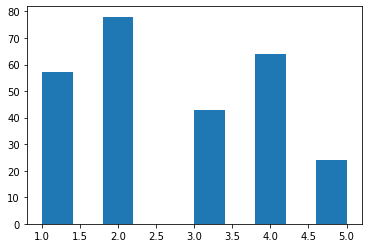

In [6]:
plt.hist(trevorCoded['obsCoded'])

(array([23.,  0., 67.,  0.,  0., 72.,  0., 73.,  0., 31.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

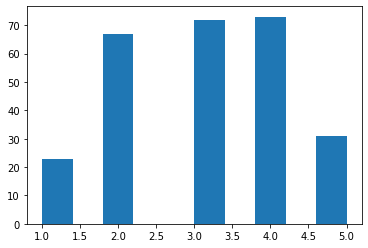

In [7]:
plt.hist(samCoded['obsCoded'])

### Radar plots

In [381]:
observationsCount

,ObservationNum
StudentNum,
1,11
2,34
3,32
4,21
5,14
6,12
7,11
8,12
10,15


In [393]:
observationsCount.std()

ObservationNum    8.00735
dtype: float64

In [392]:
observationsCount.mean()

ObservationNum    15.647059
dtype: float64

In [344]:
trevorCodedCounts

,studentNum,pct1,pct2,pct3,pct4,pct5,pct1n2,pct4n5
0,1.0,9.09,18.18,27.27,36.36,9.09,27.27,45.45
1,2.0,35.29,32.35,8.82,20.59,2.94,67.64,23.53
2,3.0,9.38,50.00,0.00,31.25,9.38,59.38,40.63
3,4.0,4.76,19.05,14.29,38.10,23.81,23.81,61.91
4,5.0,28.57,14.29,28.57,21.43,7.14,42.86,28.57
5,6.0,50.00,25.00,16.67,8.33,0.00,75.00,8.33
6,7.0,0.00,27.27,18.18,27.27,27.27,27.27,54.54
7,8.0,41.67,16.67,25.00,8.33,8.33,58.34,16.66
8,10.0,20.00,46.67,26.67,6.67,0.00,66.67,6.67
9,11.0,15.00,20.00,30.00,35.00,0.00,35.00,35.00


In [160]:
#Adapted from https://python-graph-gallery.com/390-basic-radar-chart/

def radarPlot75(rowNum, show=False):
    # number of variables
    categories=list(trevorCodedCounts)[1:-2]
    N = len(categories)
    
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = trevorCodedCounts.loc[rowNum].drop(['studentNum', 'pct1n2', 'pct4n5']).values.flatten().tolist()
    values += values[:1]
    values
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25, 50, 75], ['25%', '50%', '75%'], color="grey", size=7)
    plt.ylim(0,75)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(f'Student {int(trevorCodedCounts.studentNum[rowNum])}', color="grey")

    ax.set_theta_offset(- 2*pi /5 *2 + pi/2 + pi)


    # Show the graph
    plt.savefig(f'Plots/student{int(trevorCodedCounts.studentNum[rowNum])}.png', dpi=2000, bbox_inches='tight')
    if show == True:
        plt.show()
    else:
        plt.close()
        return 'Done'

In [161]:
for student in range(len(trevorCodedCounts)):
    radarPlot75(student)

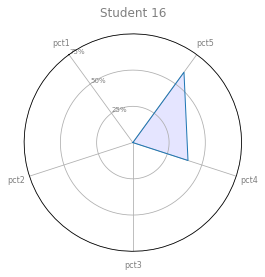

In [343]:
radarPlot75(14, show= True)

In [376]:
def radarPlot75Mult(rowNums, custTitle=False, show=False):
    rowNums.sort()
    # number of variables
    categories=list(trevorCodedCounts)[1:-2]
    N = len(categories)

    titleNums =''
    for ind, val in enumerate(rowNums):
        if ind+1 == len(rowNums):
            titleNums += f'{int(trevorCodedCounts.studentNum[val])}'
        else:
            titleNums += f'{int(trevorCodedCounts.studentNum[val])}, '

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    
    for rowNum in rowNums:
        values = trevorCodedCounts.loc[rowNum].drop(['studentNum', 'pct1n2', 'pct4n5']).values.flatten().tolist()
        values += values[:1]

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Student {int(trevorCodedCounts.studentNum[rowNum])}")
        # Fill area
        ax.fill(angles, values, alpha=0.1)
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25, 50, 75], ['25%', '50%', '75%'], color="grey", size=7)
    plt.ylim(0,75)

    if custTitle != False:
        plt.title(custTitle, color="grey")
    else:
        plt.title(f'Students {titleNums}', color="grey")

    ax.set_theta_offset(- 2*pi /5 *2 + pi/2 + pi)

    plt.legend(bbox_to_anchor=(0.1, 0.1))

    # Show the graph
    plt.savefig(f'Plots/student[{titleNums}].png', dpi=2000, bbox_inches='tight')
    if show == True:
        plt.show()
    else:
        plt.close()
        return 'Done'

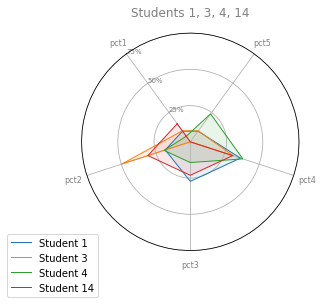

In [379]:
radarPlot75Mult([0, 2, 3, 12], show= True)

In [345]:
trevorCodedCounts

,studentNum,pct1,pct2,pct3,pct4,pct5,pct1n2,pct4n5
0,1.0,9.09,18.18,27.27,36.36,9.09,27.27,45.45
1,2.0,35.29,32.35,8.82,20.59,2.94,67.64,23.53
2,3.0,9.38,50.00,0.00,31.25,9.38,59.38,40.63
3,4.0,4.76,19.05,14.29,38.10,23.81,23.81,61.91
4,5.0,28.57,14.29,28.57,21.43,7.14,42.86,28.57
5,6.0,50.00,25.00,16.67,8.33,0.00,75.00,8.33
6,7.0,0.00,27.27,18.18,27.27,27.27,27.27,54.54
7,8.0,41.67,16.67,25.00,8.33,8.33,58.34,16.66
8,10.0,20.00,46.67,26.67,6.67,0.00,66.67,6.67
9,11.0,15.00,20.00,30.00,35.00,0.00,35.00,35.00


In [347]:
trevorCodedCounts.studentNum[0]

1.0

In [349]:
rowNums = [0, 2, 3, 12]
titleNums =''
for ind, val in enumerate(rowNums):
    if ind+1 == len(rowNums):
        titleNums += f'{int(trevorCodedCounts.studentNum[val])}'
    else:
        titleNums += f'{int(trevorCodedCounts.studentNum[val])}, '

print(titleNums)

1, 3, 4, 14


In [390]:
def radarPlot75MultCust(rowNums, custTitle=False, show=False):
    rowNums.sort()
    # number of variables
    categories=list(trevorCodedCounts)[1:-2]
    N = len(categories)

    titleNums =''
    for ind, val in enumerate(rowNums):
        if ind+1 == len(rowNums):
            titleNums += f'{int(trevorCodedCounts.studentNum[val])}'
        else:
            titleNums += f'{int(trevorCodedCounts.studentNum[val])}, '

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    

    values = trevorCodedCounts.loc[6].drop(['studentNum', 'pct1n2', 'pct4n5']).values.flatten().tolist()
    values += values[:1]

        # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Student {int(trevorCodedCounts.studentNum[6])}")
        # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
 
    values = trevorCodedCounts.loc[14].drop(['studentNum', 'pct1n2', 'pct4n5']).values.flatten().tolist()
    values += values[:1]

        # Plot data
    ax.plot(angles, values, 'g', linewidth=1, linestyle='solid', label=f"Student {int(trevorCodedCounts.studentNum[14])}")
        # Fill area
    ax.fill(angles, values, 'g', alpha=0.1)
    
       
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25, 50, 75], ['25%', '50%', '75%'], color="grey", size=7)
    plt.ylim(0,75)

    if custTitle != False:
        plt.title(custTitle, color="grey")
    else:
        plt.title(f'Students {titleNums}', color="grey")

    ax.set_theta_offset(- 2*pi /5 *2 + pi/2 + pi)

    plt.legend(bbox_to_anchor=(0.1, 0.1))

    # Show the graph
    plt.savefig(f'Plots/student[{titleNums}].png', dpi=2000, bbox_inches='tight')
    if show == True:
        plt.show()
    else:
        plt.close()
        return 'Done'

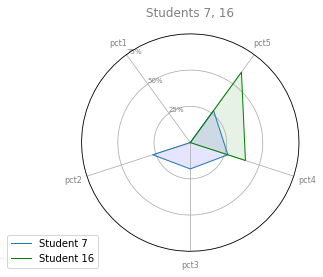

In [391]:
radarPlot75MultCust([6, 14], show= True)